In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [20]:
from scipy.constants import mu_0, c

# Power Handling


For coaxial, the electric field is :
$$
E(\rho)=\frac{1}{\rho}\frac{V}{\ln\left(b/a\right)}
$$

where $a<\rho<b$.

This is maximum 

In [21]:
a = 140e-3 /2 # inner conductor radius
b = 230e-3 /2 # inner conductor radius

In [22]:
def coax_electric_field(rho, V, a, b):
    """
    Returns the electric field in a coaxial line.
    """
    return 1/rho*V/log(b/a)

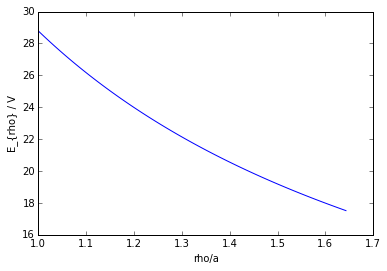

In [23]:
rho = linspace(a, b, 101)
V = 1 # V
plot(rho/a, coax_electric_field(rho, V, a, b)/V)
xlabel('rho/a')
ylabel('E_{rho} / V')

This is maximum for $\rho=a$. Let us suppose that the peak voltage $V_p$ (or equivalently the maximum RF power $P_p$ the line can handle) is set by the breakdown voltage of the insulator. The electric field strength at which breakdown occurs depends on the respective geometries of the insulator and the electrodes with which the electric field is applied. In the case of the air, the dielectric strength is $E_p$=3.0 MV/m.
$$
E_{max} = E(\rho=a) = V_p / (a \ln(b/a))
$$

Thus,
$$
V_p = E_{max} a \ln(b/a)
$$

In [24]:
Ep = 3.0e6 # V/m
Vp = Ep*a*log(b/a)
Vp

104251.74612591714

One get a peak voltage of 104kV. In terms of power, for a 30 Ohm characteric impedance, this leads to:
$$
P_d = \frac{V^2}{2 Z_0}
$$

In [25]:
Z0 = 30
Pd = Vp**2 / (2*Z0)
print(Pd/1e6)

181.140442838


A maximum power of 181 MW.

Now let's look how the power handling (ie the max power) evolves vs the geometrical parameters $a$ and $b$. As seen above, the maximum power is: 
$$
P_{max} 
= \frac{V^2_{max}}{2 Z_0}
$$
with 
$$
    Z_0 = \frac{377}{2\pi}\sqrt{\frac{\mu_r}{\varepsilon_r}} \ln\left(\frac{b}{a}\right)
$$
and
$$
    V_{max} = E_{max} a \ln\left(\frac{b}{a}\right)
$$

Thus,
$$
P_{max} \approx \frac{E^2_{max} a^2}{120} \ln\left(\frac{b}{a}\right)
$$
Or, rewriting in terms of $b/a$ :
$$
P_{max} \approx \frac{E^2_{max} b^2}{120} \frac{ \ln\left(\frac{b}{a}\right) }{\left(b/a\right)^2}
$$


$$
\frac{\partial P_{max}}{\partial a}
= 
0
\rightarrow
\frac{\partial}{\partial a}
\left( \frac{\ln(b/a)}{(b/a)^2}\right)
=
0
$$
ie
$$
2\ln(b/a) - 1 = 0
$$
which is satisfied for 
$$
b/a=\exp(1/2)\approx 1.65
$$

The maximum is for x= 1.648


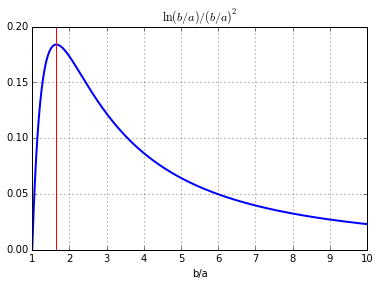

In [26]:
x = linspace(1, 10, 1001)
y = log(x)/x**2
plot(x, y, lw=2)
xlabel('b/a')
axvline(x=exp(1/2), color='r')
grid(True)
title('$\ln(b/a) / (b/a)^2$')
print('The maximum is for x=', x[argmax(y)])

The second term is maximum at $b/a$ is around 1.65.

In [27]:
def coax_char_impedance(a, b, eps_r=1, mu_r=1):
    """
    Returns the characteristic impedance of a coaxial line
    """
    return 377/(2*pi)*sqrt(mu_r/eps_r)*log(b/a)

This maximum corresponds to an impedance of :

In [28]:
coax_char_impedance(1, 1.65)

30.047225143476474

# Probe equations
We measure the $S_{21}$ term, where port 1 energizes the rigid coaxial line and port 2 the probe. By definition:
$$
S_{21} = \frac{b_2}{a_1}
$$

Our measurement is the combination of transmission losses due to the impedance transformers and the rigid line up to the probe duct, i.e. $S_{21} = S_{21,loss} + S_{21,probe}$, with: 
$$
S_{21,probe} = \frac{b_2}{a_l}
$$
where $a_l$ is the power wave in the rigid line at the probe location. 

If we assume that the rigid line is perfectly matched, one gets:
$$
V_{l} = \sqrt{30} (a_l + b_l) = \sqrt{30} a_l \approx \sqrt{30} a_1 \rightarrow  a_1 = \frac{V_l}{\sqrt{30}}
$$
and if the probe is not energized from port 2:
$$
V_2 = \sqrt{50} b_2 \rightarrow b_2 = \frac{V_2}{\sqrt{50}}
$$

Thus,
$$
S_{21,probe} = \frac{\sqrt{30}}{\sqrt{50}} \frac{V_2}{V_l} 
$$

The voltage in the rigid line $V_l$ can be deduced from the voltage at the probe $V_2$ and the transmission loss of the setup $S_{21,probe}$:
$$
\boxed{
V_l = \frac{\sqrt{30}}{\sqrt{50}} \frac{V_2}{S_{21,probe}} 
}$$


In [5]:
30/50 * 1/10

0.06

In [8]:
(sqrt(6/100) - sqrt(1/10))/sqrt(1/10)

-0.22540333075851668

In [6]:
20*log10(sqrt(50/30)*10**(-80/20))

-77.781512503836439

The voltage in the rigid line is thus given from the [0-10V] signal voltage by:
$$
V_{line} = \sqrt{2 Z_0 P_{line}}
$$
where the power in the line $P_{line}$ is given from the power in the probe $P_{probe}$ by:
$$
P_{line} [W] = P_{probe} [W] \times 10^{|G|/10}
$$
with $G$ the probe gain ($G=|S_{21,probe,dB}| - losses$) in dB. Finally, if the probe power is expressed in dBm, we have:
$$
\boxed{
V_{line} = \sqrt{2 \times 30 \times \frac{10^{(P_{probe}[dBm]+|G])/10}}{1000} }
}
$$


##Signal Conditioning
The probe input power $P_{probe}$ is generally expressed in dBm and is rectified into a 0-10V voltage $V_s$ signal using a log amplifier. The output signal voltage is then proportional to the power input signal:
$$
V_{s} [V] = a \times P_{probe} [dBm] + b
$$
The calibration process which gives coefficients $a$ and $b$ is performed for different frequencies. Once calibrated, these coefficients are used to invert the signal voltage to retrieve the power in the prove in the above equation:
$$
P_{probe} [dBm] = \frac{V_s}{a} - \frac{b}{a}
$$



# Probe Goal Attenuation

We recall here that we search for the ideal probe attenuation in order that the power ouput by the probe should be between [-4, 25] dBm and gives a [0,10] V signal, for an input voltage in the line between [5, 55] kV
![](./ICRH_Probe-Calibration/signal_rectification.png)


Let's first illustrate this by an example, for a voltage in the line of 55 kV and -80 dB probe attenuation:


In [29]:
S21 = -80 # Example of attenuation factor [dB]
V_line = 55e3 # Voltage in the transmission line [V]
V_probe = V_line * 10**(S21/20) # voltage at probe in [V]
print('Voltage at probe: {} V'.format(V_probe))

Voltage at probe: 5.5 V


In [30]:
Z0 = 50 # Characteristic Impedance of the probe cable and amplifier [Ohm]
Power_probe = 10*np.log10(V_probe**2 / (2*Z0) * 1000) # power at the probe in [dBm]
print('Power at probe: {} dBm'.format(Power_probe)) 

Power at probe: 24.80725378988488 dBm


As we want to measure voltage between 5 and 55 kV, using the previous expressions lead to: 
$$
10 \log\left( 
\frac{10^{P_{probe,[dBm]}/10} 2 Z_0 }{ 1000  V_{line}^2 }
\right)
$$

# Coaxial Line Attenuation

Let's fix the frequency and vary the dimensions to see how evolve the attenutation

$$
\frac{\partial \alpha}{\partial a} = 0 
\rightarrow 
\frac{R_s}{2} \sqrt{\frac{\varepsilon}{\mu}} 
\frac{\partial }{\partial a}
\left( 
\frac{1/a+1/b}{\ln(b/a)}
\right)
=0
$$

$$
\rightarrow 1 + a/b - \ln\left(\frac{b}{a}\right) = 0
$$

Let's see where this equation is satisfied :

In [31]:
from scipy.optimize import minimize

def fun(u):
    return abs(1+1/u-log(u))

sol = minimize(fun, x0=3)
print(sol.x)

[ 3.59112147]


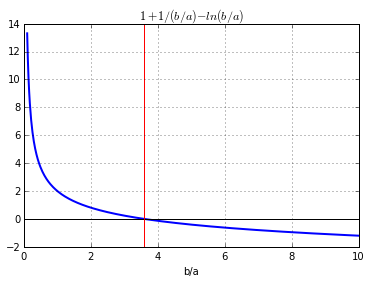

In [32]:
u = linspace(0.1, 10, 501)
test = 1+1/u-log(u)
plot(u, test, lw=2)
xlabel('b/a')
title('$1+1/(b/a)-ln(b/a)$')
#u_0 = u[argmin(abs(test))]
axhline(y=0, color='k')
grid()
axvline(x=sol.x, color='r')

The latter equation is satisfied for $b/a=3.6$, which gives an optimum characteristic impedance of 77 Ohm:

In [33]:
a = 200e-3
coax_char_impedance(a, 3.6*a)

76.857841386182059

# Optimum ?
Let's plot together the attenuation and the power handling vs characteristic impedance vs Z0

In [34]:
def coax_maximum_power(a, b, Emax=3.0e6):
    # deduces the maximum electric field from voltage breakdown value
    Vp = Emax*a*log(b/a)
    Z0 = coax_char_impedance(a, b)
    return Vp**2 / (2*Z0)

In [35]:
def coax_alpha(a, b, f, sigma=6e7):
    # sheet resistance [Ohm]
    Rs = sqrt(2*pi*f*mu_0/(2*sigma))
    # Resistance per meter [Ohm/m]
    R = Rs/(2*pi)*(1/a + 1/b)
    # Characteristic Impedance [Ohm]
    Z0 = coax_char_impedance(a, b)
    # Attenuation [1/m]
    return R/(2*Z0)

In [36]:
a = linspace(20e-3, 450e-3) # inner conductor radius
b = 500e-3
f = 60e6

Z0 = coax_char_impedance(a, b)

alpha = coax_alpha(a, b, f)
alpha_norm = alpha/min(alpha)

max_pow = coax_maximum_power(a, b)
max_pow_norm = max_pow/max(max_pow)

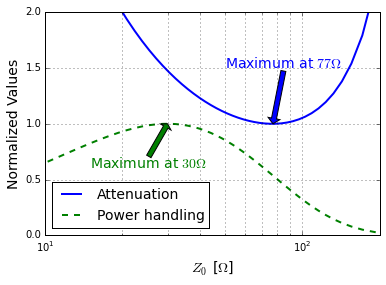

In [37]:
semilogx(Z0, alpha_norm, lw=2)
semilogx(Z0, max_pow_norm, '--', lw=2)
legend(('Attenuation', 'Power handling'), fontsize=14, loc='best')

grid(True, which='major')
grid(True, which='minor', axis='x')
xlabel('$Z_0$ [$\Omega$]', fontsize=14)
ylabel('Normalized Values', fontsize=14)

axis([10, 200, 0, 2])
ax=gca()
ax.annotate('Maximum at $30\Omega$', xy=(30,1), xytext=(15,0.60), 
            color='g', arrowprops=dict(facecolor='g', width=5),
            fontsize=14)
ax.annotate('Maximum at $77\Omega$', xy=(77,1), xytext=(50,1.5), 
            color='b', arrowprops=dict(facecolor='b', width=5),
            fontsize=14)

#Low Frequency Measurements

We load the $b_2/b_1$ measurement which is performed at low frequencies

In [38]:
freq, reB2overB1, imB2overB1 = loadtxt('ICRH_Probe-Calibration/SLIDING_BF.ASC', skiprows=14, delimiter=';', unpack=True)

In [39]:
B2overB1 = reB2overB1 + 1j*imB2overB1
B2overB1_dB = 20*log10(abs(B2overB1))

Let's plot the results versus the frequency

(0.29999999999999999, 2.3999999999999999)

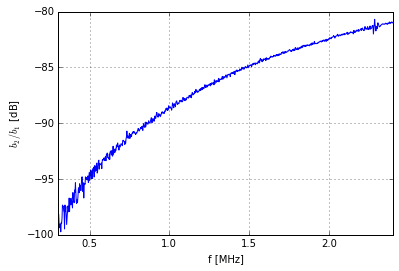

In [40]:
plot(freq/1e6, B2overB1_dB)
xlabel('f [MHz]')
ylabel('$b_2/b_1$ [dB]')
grid()
xlim(min(freq/1e6), max(freq/1e6))

Let's do the same into a log scale:

(300000.0, 2400000.0)

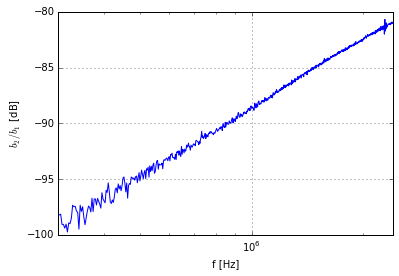

In [41]:
semilogx(freq, B2overB1_dB)
xlabel('f [Hz]')
ylabel('$b_2/b_1$ [dB]')
grid()
xlim(min(freq), max(freq))

The plot look like pretty linear. Let's fit with a linear trends to see how it evolves with respect to the log10 of the frequency:

In [42]:
freq_log = log10(freq)
# fits the curve with a linear polynom y=a*x+b
a,b=polyfit(freq_log, B2overB1_dB, deg=1)
print(a,b)

20.4590556226 -211.340920411


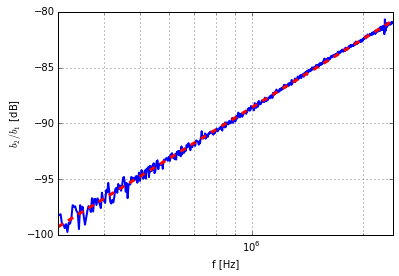

In [43]:
semilogx(freq, B2overB1_dB, lw=2)
semilogx(freq, a*freq_log + b, '--r', lw=3)
grid()
grid(which='minor', axis='x')
xlim(min(freq), max(freq))
xlabel('f [Hz]')
ylabel('$b_2/b_1$ [dB]')

One can clearly see that the $b_2/b_1$ ratio increases linearly with respect to frequency decades (a decade is a factor of 10 difference between two numbers). More precisely, it increases by 20dB per decade.  

So, if we assumes that this gain $G=b_2/b_1$ can be extrapolated from the low frequencies $f_{low}$ to the working frequency $f$ (60 MHz), one should get :
$$
G_{[dB]}(f) = G(f_{low}) + 20 \log10 \left( f / f_{low} \right) 
$$

Let's make an exemple to get the gain at 60 MHz from the low frequency measurements:

-52.6346734499 0.25473824085


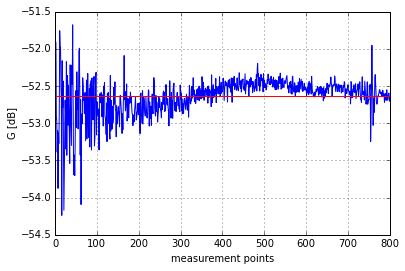

In [44]:
f = 62.5e6
G = B2overB1_dB + 20*log10(f/freq)
G_mean = mean(G)
G_std = std(G)

plot(G)
axhline(y=G_mean, color='r')
grid()
ylabel('G [dB]')
xlabel('measurement points')
print(G_mean, G_std)

The gain at 60 MHz extrapolated from low frequency measurement is thus G=-52.99 dB $\pm$ 0.25 dB

Let's look to the welded probe results

## CEA-side and DUT-side probes


In [45]:
# Band sweep
CEA1_freq, CEA1_reB2overB1, CEA1_imB2overB1 = loadtxt('ICRH_Probe-Calibration/CEA_BF1.ASC', skiprows=14, delimiter=';', unpack=True)
CEA1_B2overB1_dB = 20*log10(abs(CEA1_reB2overB1 + 1j*CEA1_imB2overB1))
# Point sweep
CEA2_freq, CEA2_reB2overB1, CEA2_imB2overB1 = loadtxt('ICRH_Probe-Calibration/CEA_BF2.ASC', skiprows=14, delimiter=';', unpack=True)
CEA2_B2overB1_dB = 20*log10(abs(CEA2_reB2overB1 + 1j*CEA2_imB2overB1))


DUT1_freq, DUT1_reB2overB1, DUT1_imB2overB1 = loadtxt('ICRH_Probe-Calibration/DUT_BF1.ASC', skiprows=14, delimiter=';', unpack=True)
DUT1_B2overB1_dB = 20*log10(abs(DUT1_reB2overB1 + 1j*DUT1_imB2overB1))

DUT2_freq, DUT2_reB2overB1, DUT2_imB2overB1 = loadtxt('ICRH_Probe-Calibration/DUT_BF2.ASC', skiprows=14, delimiter=';', unpack=True)
DUT2_B2overB1_dB = 20*log10(abs(DUT2_reB2overB1 + 1j*DUT2_imB2overB1))


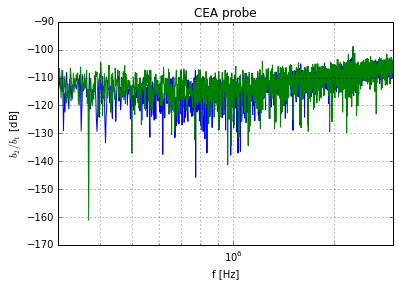

In [46]:
semilogx(CEA1_freq, CEA1_B2overB1_dB)
semilogx(CEA2_freq, CEA2_B2overB1_dB)
grid()
grid(which='minor', axis='x')
xlim(min(CEA1_freq), max(CEA1_freq))
xlabel('f [Hz]')
ylabel('$b_2/b_1$ [dB]')
title('CEA probe')

3.45964210418e-06 -116.701952498
3.5320935138e-06 -117.142517059


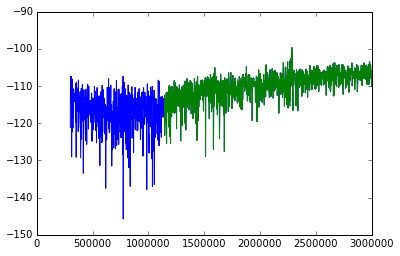

In [47]:
a,b = polyfit(CEA1_freq[1000:], CEA1_B2overB1_dB[1000:], deg=1)
print(a,b)
a,b = polyfit(CEA2_freq, CEA2_B2overB1_dB, deg=1)
print(a,b)
plot(CEA1_freq, CEA1_B2overB1_dB)
plot(CEA1_freq[500:], CEA1_B2overB1_dB[500:])

In [48]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

CEA probe average extrapoled gain : G=-79.91152614852541+/-0.0739369563094139 dB
DUT probe average extrapoled gain : G=-76.61672698036736+/-0.05078936564054389 dB


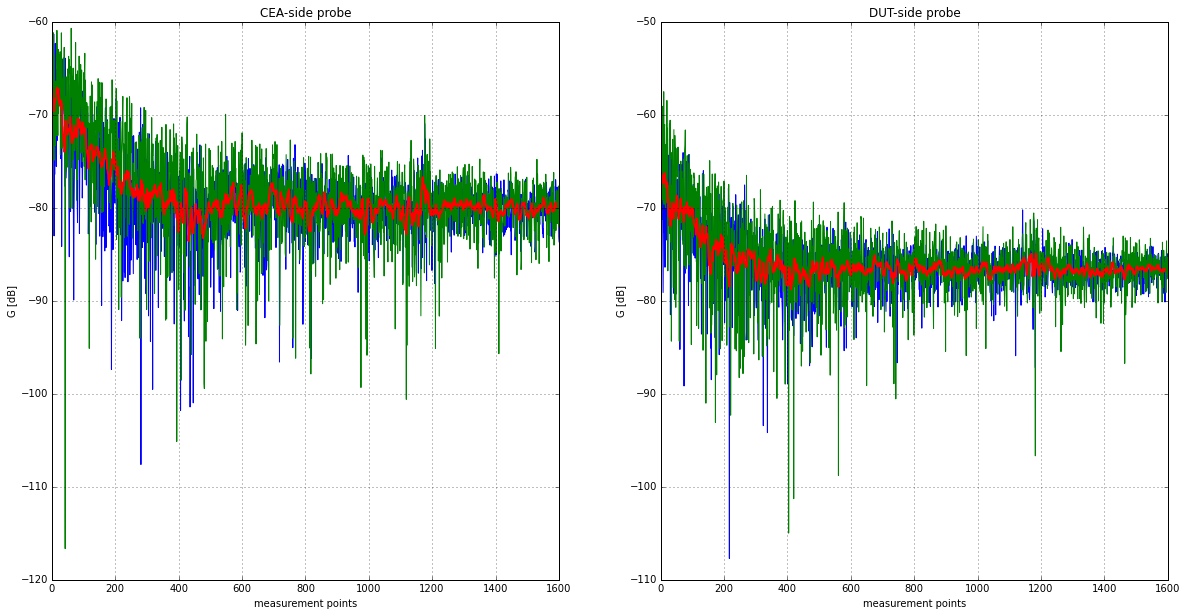

In [49]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 20, 10

f = 62.5e6

G_DUT1 = DUT1_B2overB1_dB + 20*log10(f/DUT1_freq)
G_DUT2 = DUT2_B2overB1_dB + 20*log10(f/DUT2_freq)

G_CEA1 = CEA1_B2overB1_dB + 20*log10(f/CEA1_freq)
G_CEA2 = CEA2_B2overB1_dB + 20*log10(f/CEA2_freq)

subplot(121)
plot(G_CEA1)
plot(G_CEA2)
grid()
ylabel('G [dB]')
xlabel('measurement points')
title('CEA-side probe')
plot(moving_average((G_CEA1+G_CEA2)/2,10), lw=2)

subplot(122)
plot(G_DUT1)
plot(G_DUT2)
grid()
ylabel('G [dB]')
xlabel('measurement points')
title('DUT-side probe')

plot(moving_average((G_DUT1+G_DUT2)/2,10), lw=2)
# average for the last 1000 points
# Standard error calculation to determine the error bar
N=500

CEA_avg = mean(moving_average((G_CEA1[N:]+G_CEA2[N:])/2,10))
DUT_avg = mean(moving_average((G_DUT1[N:]+G_DUT2[N:])/2,10))

DUT_standard_error = std((G_DUT1[N:]+G_DUT2[N:])/2) / sqrt(len(G_DUT1[N:]))
CEA_standard_error = std((G_CEA1[N:]+G_CEA2[N:])/2) / sqrt(len(G_CEA1[N:]))

print('CEA probe average extrapoled gain : G={}+/-{} dB'.format(CEA_avg, CEA_standard_error))
print('DUT probe average extrapoled gain : G={}+/-{} dB'.format(DUT_avg, DUT_standard_error))



#A little bit of theory
So, why does the gain evolves that way? Let's look to the probe configuration 
![](./IC-Hands-on_solutions_files/equivalent_circuit.png)

The transfer function is such:
$$
\frac{V_{probe}}{V_{line}}
=
\frac{R + Z_{C_s}}{R + Z_{C_s} + Z_{C_1}}
$$
ie
$$
\frac{V_{probe}}{V_{line}}
=
$$

where $C_s$ is the stray capacitance and $C_1 \ll C_s$.  

In [50]:
R = 50
C1 = 1e-15 # unknow
Cs = C1 * (10**(211/20) -1) # fit from the sliding probe linear fit (-211 dB at omega=0)

f = logspace(0, 9, 301)
Z_Cs = 1/(1j*2*pi*f*Cs)
Z_C1 = 1/(1j*2*pi*f*C1)

G = (R + Z_Cs)/(R + Z_Cs + Z_C1)
G_dB = 20*log10(abs(G))

20*log10( 1/Cs / (1/Cs + 1/C1) )

-211.0

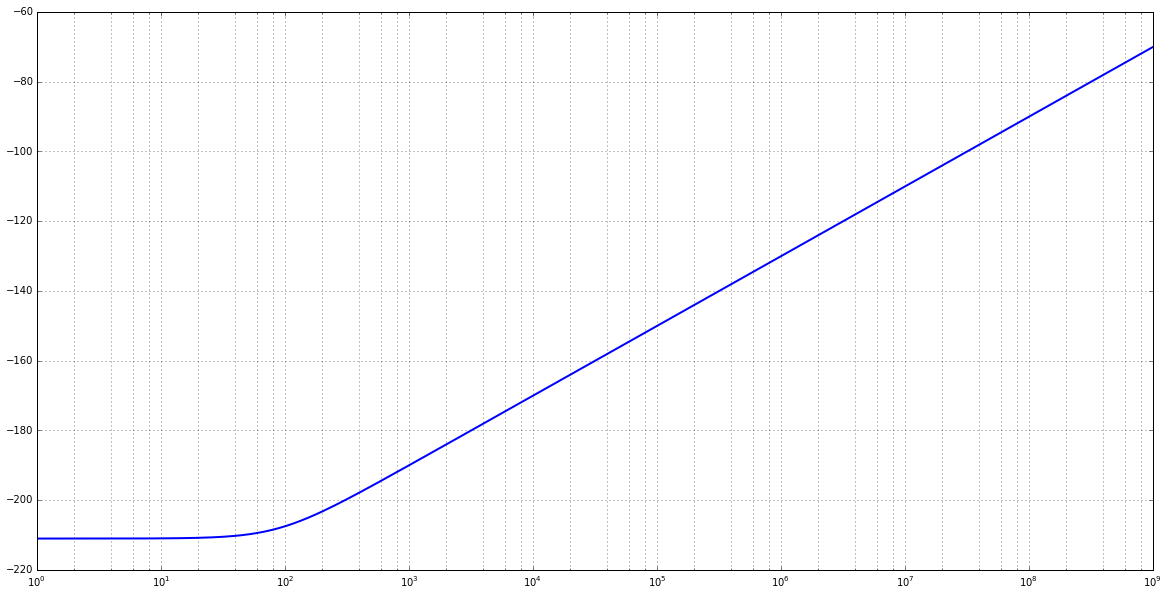

In [51]:
semilogx(f, G_dB, lw=2)
grid()
grid(which='minor', axis='x')